# Assignment 8 Clara Jones

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns; sns.set()


In [3]:
bankdf = pd.read_csv('UniversalBank.csv')
bankdf.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
bankdf.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
bankdf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
bankdf['Number'] = bankdf.index + 1
bankdf.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Number
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,2
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,3
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,4
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,5
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,6
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,7
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,8
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,9
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,10


In [7]:
bankdf.corr().round(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Number
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02,1.00
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01,-0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01,-0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00,-0.02
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01,-0.02
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01,-0.02
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01,0.02
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00,-0.02


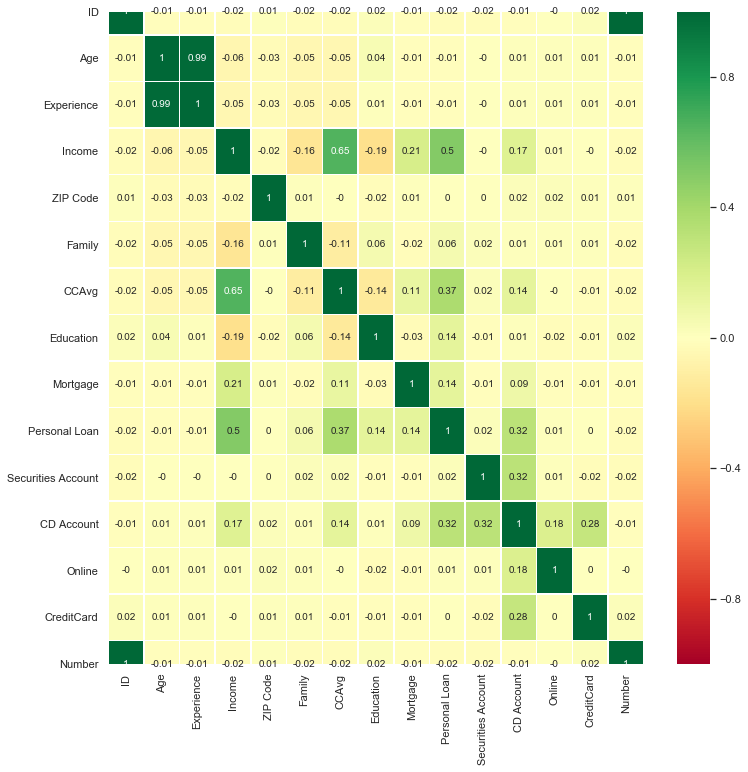

In [8]:
data = bankdf.corr().round(2)

plt.figure(figsize=(12,12))

sns.heatmap(data, linewidths=.5, annot=True, center=0, vmin=-1, vmax=1,cmap="RdYlGn")
plt.show()

In [9]:
#edu = str(bankdf['Education'])
#bankdf = pd.get_dummies(bankdf.str([edu]), prefix_sep='_', drop_first=True)
#bankdf = bankdf['Education'].apply(str)
#bankdf.head()
#bankdf.Education = bankdf.Education.astype(str)
bankdf.Education = bankdf.Education.apply(str)

In [10]:
#edu = ['Education']
#bankdf = pd.get_dummies(bankdf[edu], prefix_sep='_', drop_first=False)
#bankdf.head(10)

In [11]:
#edu = ['Education']
bankdf2 = pd.get_dummies(bankdf, prefix_sep='_', drop_first=False)
bankdf2.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Number,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,2,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,3,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,4,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,5,0,1,0
5,6,37,13,29,92121,4,0.4,155,0,0,0,1,0,6,0,1,0
6,7,53,27,72,91711,2,1.5,0,0,0,0,1,0,7,0,1,0
7,8,50,24,22,93943,1,0.3,0,0,0,0,0,1,8,0,0,1
8,9,35,10,81,90089,3,0.6,104,0,0,0,1,0,9,0,1,0
9,10,34,9,180,93023,1,8.9,0,1,0,0,0,0,10,0,0,1


In [12]:
trainData, validData = train_test_split(bankdf2, test_size=0.4, random_state=1)

# create new dataframe for what we want to predict
newLoan = pd.DataFrame([{'Age': 40,
                         'Experience':10,
                         'Income':84,
                         'Family':2,
                         'CCAvg':2,
                         'Education_1':0,
                        'Education_2':1,
                        'Education_3':0,
                        'Mortgage':0,
                        'Securities Account':0,
                        'CD Account':0,
                        'Online':1,
                        'CreditCard':1}])
newLoan

,Age,Experience,Income,Family,CCAvg,Education_1,Education_2,Education_3,Mortgage,Securities Account,CD Account,Online,CreditCard
0,40,10,84,2,2,0,1,0,0,0,0,1,1


In [13]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
        'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Education_1', 'Education_2', 'Education_3',]])  # Note the use of an array of column names

# Transform the full dataset
bankNorm = pd.concat([pd.DataFrame(scaler.transform(bankdf2[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
                                                             'Mortgage', 'Securities Account',
                                                             'CD Account', 'Online', 'CreditCard',
                                                             'Education_1', 'Education_2', 'Education_3']]), 
                                    columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                             'zMortgage', 'zSecurities Account', 'zCD Account',
                                             'zOnline', 'zCreditCard',
                                             'zEducation_1', 'zEducation_2', 'zEducation_3',]),
                       bankdf2[['Personal Loan', 'Number']]], axis=1)
trainNorm = bankNorm.iloc[trainData.index]
validNorm = bankNorm.iloc[validData.index]
newLoanNorm = pd.DataFrame(scaler.transform(newLoan), columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                                               'zMortgage', 'zSecurities Account',
                                                               'zCD Account', 'zOnline', 'zCreditCard',
                                                               'zEducation_1', 'zEducation_2', 'zEducation_3',])

In [14]:
newLoanNorm

,zAge,zExperience,zIncome,zFamily,zCCAvg,zMortgage,zSecurities Account,zCD Account,zOnline,zCreditCard,zEducation_1,zEducation_2,zEducation_3
0,-0.486446,-0.901063,0.220892,-0.352127,0.035689,-0.559242,2.96714,-0.252646,-1.198767,-0.6505,-0.838795,1.591719,1.513101


In [15]:
knn = NearestNeighbors(n_neighbors=1)
knn.fit(trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                                               'zMortgage', 'zSecurities Account',
                                                               'zCD Account', 'zOnline', 'zCreditCard',
                                                               'zEducation_1', 'zEducation_2', 'zEducation_3']])
distances, indices = knn.kneighbors(newLoanNorm)
print(trainNorm.iloc[indices[0], :])  # indices is a list of lists, we are only interested in the first element

          zAge  zExperience  zIncome   zFamily    zCCAvg  zMortgage  \
4720 -0.399285    -0.465388  0.30722 -1.225168  0.495057  -0.559242   

      zSecurities Account  zCD Account   zOnline  zCreditCard  zEducation_1  \
4720              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   

      zEducation_2  zEducation_3  Personal Loan  Number  
4720     -0.628252      1.513101              0    4721  


a) This person would be classified as as a non success because their Personal Loan value is 0

b) The choice of k that balances between overfitting and ignoring predictors is what value k takes on. A small k value will be very sensitive to the local data nearby, and a large k value will ignore the information in the predictors.

In [16]:
# CONFUSION MATRIX

In [17]:
train_X = trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                                               'zMortgage', 'zSecurities Account',
                                                               'zCD Account', 'zOnline', 'zCreditCard',
                                                               'zEducation_1', 'zEducation_2', 'zEducation_3']]
train_y = trainNorm['Personal Loan']
valid_X = validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                                               'zMortgage', 'zSecurities Account',
                                                               'zCD Account', 'zOnline', 'zCreditCard',
                                                               'zEducation_1', 'zEducation_2', 'zEducation_3']]
valid_y = validNorm['Personal Loan']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)  

     k  accuracy
0    1    0.9545
1    2    0.9500
2    3    0.9535
3    4    0.9495
4    5    0.9565
5    6    0.9495
6    7    0.9520
7    8    0.9460
8    9    0.9475
9   10    0.9435
10  11    0.9465
11  12    0.9435
12  13    0.9450
13  14    0.9435


In [18]:
# Retrain with full dataset
bank_X = bankNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                                               'zMortgage', 'zSecurities Account',
                                                               'zCD Account', 'zOnline', 'zCreditCard',
                                                               'zEducation_1', 'zEducation_2', 'zEducation_3']]
bank_y = bankNorm['Personal Loan']
knn = KNeighborsClassifier(n_neighbors=5).fit(bank_X, bank_y)
distances, indices = knn.kneighbors(newLoanNorm)
print(knn.predict(newLoanNorm))
print('Distances',distances)
print('Indices', indices)
print(bankNorm.iloc[indices[0], :])

[0]
Distances [[2.40036766 2.40449362 2.47110341 2.52744656 2.54346993]]
Indices [[4702 3601 4720 1068  123]]
          zAge  zExperience   zIncome   zFamily    zCCAvg  zMortgage  \
4702 -0.922251    -1.336738  0.738860 -0.352127  0.466347  -0.559242   
3601 -0.747929    -0.639658  0.026654  0.520915  0.380215  -0.559242   
4720 -0.399285    -0.465388  0.307220 -1.225168  0.495057  -0.559242   
1068 -1.009412    -0.988198  0.674114  0.520915 -0.423679  -0.559242   
123  -0.747929    -0.639658  0.220892 -1.225168  0.954425  -0.559242   

      zSecurities Account  zCD Account   zOnline  zCreditCard  zEducation_1  \
4702              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
3601              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
4720              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
1068              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
123               2.96714    -0.252646 -1.198767      -0.6505 

In [19]:
con_matrix = pd.DataFrame(confusion_matrix(valid_y, knn.predict(valid_X)))
con_matrix

,0,1
0,1805,2
1,58,135


In [20]:
con_matrix = pd.DataFrame(confusion_matrix(bank_y, knn.predict(bank_X)))
con_matrix

,0,1
0,4511,9
1,126,354


In [21]:
knn = NearestNeighbors(n_neighbors=5)
knn.fit(trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                                               'zMortgage', 'zSecurities Account',
                                                               'zCD Account', 'zOnline', 'zCreditCard',
                                                               'zEducation_1', 'zEducation_2', 'zEducation_3']])
distances, indices = knn.kneighbors(newLoanNorm)
print(trainNorm.iloc[indices[0], :])  # indices is a list of lists, we are only interested in the first element

          zAge  zExperience   zIncome   zFamily    zCCAvg  zMortgage  \
4720 -0.399285    -0.465388  0.307220 -1.225168  0.495057  -0.559242   
1068 -1.009412    -0.988198  0.674114  0.520915 -0.423679  -0.559242   
3881  0.036520    -0.029713 -0.404986 -1.225168 -0.251416  -0.559242   
3849 -0.312124    -0.203983 -0.858208 -1.225168  0.035689  -0.559242   
4569  0.123682     0.057422 -0.534478  0.520915  0.150531  -0.559242   

      zSecurities Account  zCD Account   zOnline  zCreditCard  zEducation_1  \
4720              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
1068              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
3881              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
3849              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   
4569              2.96714    -0.252646 -1.198767      -0.6505     -0.838795   

      zEducation_2  zEducation_3  Personal Loan  Number  
4720     -0.628252      1.513101  

d) the best k found above is when k=5. This leads to a classifier of 0 for personal loan.

In [23]:
X = bankNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg',
                                             'zMortgage', 'zSecurities Account', 'zCD Account',
                                             'zOnline', 'zCreditCard',
                                             'zEducation_1', 'zEducation_2', 'zEducation_3']]
y = bankdf2['Personal Loan']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.6, random_state=1)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

con_matrix = pd.DataFrame(confusion_matrix(y_train, knn.predict(X_train)))
con_matrix

,0,1
0,2255,4
1,75,166


In [27]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_valid, y_valid)

con_matrix = pd.DataFrame(confusion_matrix(y_valid, knn.predict(X_valid)))
con_matrix

,0,1
0,900,1
1,47,52


In [28]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_test, y_test)

con_matrix = pd.DataFrame(confusion_matrix(y_test, knn.predict(X_test)))
con_matrix

,0,1
0,1358,2
1,63,77


e) All three of the above confusion matrices have similar performances. The valid set has least confusion, then test set, then train set, but this makes sense because the train set is the largest so it will have both the most successes and the most mistakes.